# Clasificador CLiengo

En esta notebook se desarrolla una serie de modelos de clasificadores cuyo objetivo es predecir si una *review* es **buena** o **mala**

## Lectura de datos

Teniendo en cuenta lo realizado en notebook **EDA**, donde se realizó un análisis exploratorio de los datos, se tomará la versión del dataset preprocesado en dicha notebook.Básicamente, allí se realizarón las siguientes tareas de limpieza de texto:

* Conversión del  texto a minúscula
* Eliminación de **stopwords**
* Eliminación de los signos de puntuación
* Eliminación de **stopwords del dominio**
* Lematización de los términos

In [1]:
import pandas as pd
import numpy as np

In [2]:
df_dataset = pd.read_csv('training_data_preprocessed.csv')
df_dataset.head()

,review,score,review cleaned,reviews_length,number_of_words,reviews_avg_length,review cleaned stopwords,lemmatized
0,Era necesario mucho coraje para abordar aconte...,buena,era necesario mucho coraje para abordar aconte...,3812,649,4.873652,era necesario mucho coraje para abordar aconte...,necesario coraje abordar acontecimiento recien...
1,Esperaba con curiosidad y ciertas ganas el est...,mala,esperaba con curiosidad y ciertas ganas el est...,2259,405,4.577778,esperaba con curiosidad y ciertas ganas el est...,esperar curiosidad y gana estreno antonio band...
2,"Wes Craven, convertido en factoría, nos vuelve...",mala,wes craven convertido en factoría nos vuelve a...,1816,317,4.728707,wes craven convertido en factoría nos vuelve a...,wes cravir convertido factoría volver a contar...
3,Va la gente y se rasga las vestiduras con 'Caó...,mala,va la gente y se rasga las vestiduras con caót...,3598,624,4.766026,va la gente y se rasga las vestiduras con caót...,gente y rasgar vestidura caótico án julio mede...
4,Director: Mariano Ozores.Duración: 77 minutos....,buena,director mariano ozoresduración 77 minutosestr...,2271,395,4.749367,mariano ozoresduración minutosestreno de dic...,mariano ozoresduración minutosestreno dici...


## Generación de *features*

Para la generación de ***features*** se utilizará la matriz de ***Document Term Matrix*** 

In [3]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

cv = TfidfVectorizer(analyzer='word', ngram_range=(1,2))
data = cv.fit_transform(df_dataset['lemmatized'])
df_dtm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names())
df_dtm.index = df_dataset.index
df_dtm.head(3)

,aa,aa luz,aar,aar eckhart,aar eckhartir,abadés,abadés imaginar,abajo,abajo barriga,abajo casa,...,útil,útil absurdo,útil exposición,útil humanidad,útil osear,útil permanente,útimo,útimo moda,útlimo,útlimo década
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Una vez generados los ***features*** se procesan las etiquetas **buena** y **mala** para que sirvan de entrada al clasificador.

In [4]:
df_dataset.head()

,review,score,review cleaned,reviews_length,number_of_words,reviews_avg_length,review cleaned stopwords,lemmatized
0,Era necesario mucho coraje para abordar aconte...,buena,era necesario mucho coraje para abordar aconte...,3812,649,4.873652,era necesario mucho coraje para abordar aconte...,necesario coraje abordar acontecimiento recien...
1,Esperaba con curiosidad y ciertas ganas el est...,mala,esperaba con curiosidad y ciertas ganas el est...,2259,405,4.577778,esperaba con curiosidad y ciertas ganas el est...,esperar curiosidad y gana estreno antonio band...
2,"Wes Craven, convertido en factoría, nos vuelve...",mala,wes craven convertido en factoría nos vuelve a...,1816,317,4.728707,wes craven convertido en factoría nos vuelve a...,wes cravir convertido factoría volver a contar...
3,Va la gente y se rasga las vestiduras con 'Caó...,mala,va la gente y se rasga las vestiduras con caót...,3598,624,4.766026,va la gente y se rasga las vestiduras con caót...,gente y rasgar vestidura caótico án julio mede...
4,Director: Mariano Ozores.Duración: 77 minutos....,buena,director mariano ozoresduración 77 minutosestr...,2271,395,4.749367,mariano ozoresduración minutosestreno de dic...,mariano ozoresduración minutosestreno dici...


In [5]:
df_dataset['label'] = df_dataset['score'].apply(lambda x: 1 if x == 'buena' else 0)
df_dataset.head()

,review,score,review cleaned,reviews_length,number_of_words,reviews_avg_length,review cleaned stopwords,lemmatized,label
0,Era necesario mucho coraje para abordar aconte...,buena,era necesario mucho coraje para abordar aconte...,3812,649,4.873652,era necesario mucho coraje para abordar aconte...,necesario coraje abordar acontecimiento recien...,1
1,Esperaba con curiosidad y ciertas ganas el est...,mala,esperaba con curiosidad y ciertas ganas el est...,2259,405,4.577778,esperaba con curiosidad y ciertas ganas el est...,esperar curiosidad y gana estreno antonio band...,0
2,"Wes Craven, convertido en factoría, nos vuelve...",mala,wes craven convertido en factoría nos vuelve a...,1816,317,4.728707,wes craven convertido en factoría nos vuelve a...,wes cravir convertido factoría volver a contar...,0
3,Va la gente y se rasga las vestiduras con 'Caó...,mala,va la gente y se rasga las vestiduras con caót...,3598,624,4.766026,va la gente y se rasga las vestiduras con caót...,gente y rasgar vestidura caótico án julio mede...,0
4,Director: Mariano Ozores.Duración: 77 minutos....,buena,director mariano ozoresduración 77 minutosestr...,2271,395,4.749367,mariano ozoresduración minutosestreno de dic...,mariano ozoresduración minutosestreno dici...,1


## División del dataset en entrenamiento y test

A continuación se define una función que divide el dataset en dos: uno para entrenamiento del modelo y otro para la evaluación del mismo

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, df_dataset['label'], test_size=.25)

## Entrenamiento del modelo

A continuación se entrenan una serie de algoritmos de clasificación. Se tomaron alguno de los alogritmos clásicos en la literatura, tales como *Nearest Neighbors* y *RBF SVM*; y otros que, si bien hoy en día son clásicos, se los puede catalogar dentro de los algoritmos de clasificación que se encuentran más cercano al estado del arte, tales como  *Random Forest*, *Neural Net*, *AdaBoost*.

Los primeros sirven como *baseline* y el objetivo de los otros es superar el rendimiento de los primeros.

Dado que se tiene dos tipos de dataset, se entranarán todos los modelos con ambos con el fin de observar el impacto que produce el desbalance sobre ellos.

In [7]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

def get_clasificadores():

    names = ['Nearest Neighbors', 'RBF SVM', 'Random Forest', 'Neural Net', 'AdaBoost']

    classifiers = [
        KNeighborsClassifier(3),
        SVC(gamma=2, C=1),
        RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
        MLPClassifier(max_iter=1000),
        AdaBoostClassifier()
    ]
    
    return names, classifiers

In [8]:
names, classifiers =get_clasificadores()
#Entrenamiento de los modelos
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)

## Evaluación de los modelos

para la evaluación de los modelos se analizan las siguientes métricas que son las más utilizadas en la literatura para estos escenarios:

* **Curva ROC** que muestra la razón o proporción de *verdaderos positivos* (VPR = Razón de Verdaderos Positivos) frente a la razón o proporción de *falsos positivos* (FPR = Razón de Falsos Positivos).
* **Curva de Precision-recall** que muetra la relación que existe entre las métricas *precision* y *recall* para diferentes umbrales. La *precisión* se define como a la fracción de instancias recuperadas que son relevantes; mientras que el *recall* es la fracción de instancias relevantes que han sido recuperadas.

In [9]:
def get_plots(names, classifiers, axs, X_test, y_test, tipo_dataset ):
    
    for name, clf in zip(names, classifiers):

        plot_roc_curve(clf, X_test, y_test, ax=axs[0], name=name)
        plot_precision_recall_curve(clf, X_test, y_test, ax=axs[1], name=name)
        
    axs[0].set_title('Curva ROC - ' + tipo_dataset)
    axs[1].set_title('Curva de precision-recall - ' + tipo_dataset)

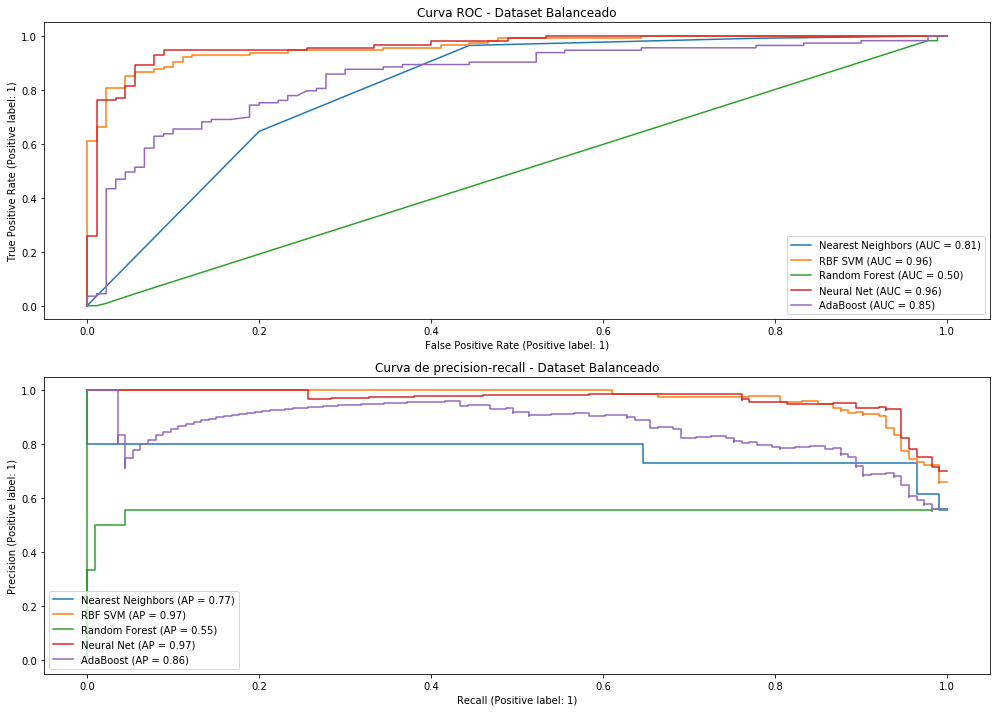

In [12]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve
import matplotlib.pyplot as plt

# Defino los graficos a mostrar
fig, ax = plt.subplots(2, 1, figsize=(14, 10))
#Calculo la curva para los modelos entrenados con el dataset balanceado
get_plots(names, classifiers, ax, X_test, y_test, 'Dataset Balanceado')

fig.tight_layout()

plt.show() 

Luego se genera un reporte con el detalle de los resultados obtenidos para los clasficadores entrenados 

In [23]:
from sklearn.metrics import classification_report

def get_reporte_clasificador(clf, X_test, y_test, df_resultados, name):
    
    y_pred = clf.predict(X_test)
    report = classification_report(y_test, y_pred, target_names=['buena', 'mala'], output_dict=True)

    df_resultados = df_resultados.append({'clasificador' : name,
                                 'precision_mala':report['mala']['precision'],
                                 'recall_mala':report['mala']['recall'],
                                 'f1-score_mala':report['mala']['f1-score'],
                                 'precision_buena':report['buena']['precision'],
                                 'recall_buena':report['buena']['recall'],
                                 'f1-score_buena':report['buena']['f1-score']}, 
                       ignore_index=True)
    
    return df_resultados

In [24]:
#Defino un dataframe donde guardar los resultados
df_resultados = pd.DataFrame({'clasificador' : [],
                             'precision_mala':[],
                             'recall_mala':[],
                             'f1-score_mala':[],
                             'precision_buena':[],
                             'recall_buena':[],
                             'f1-score_buena':[]})

#Obtenemos los resultados para los modelos entrenados con el dataset desbalanceado
for name, clf in zip(names, classifiers):
    df_resultados = get_reporte_clasificador(clf, X_test, y_test, df_resultados, name)

df_resultados

/opt/conda/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/_classificat

,clasificador,precision_mala,recall_mala,f1-score_mala,precision_buena,recall_buena,f1-score_buena
0,Nearest Neighbors,0.731544,0.964602,0.832061,0.925926,0.555556,0.694444
1,RBF SVM,0.556650,1.000000,0.715190,0.000000,0.000000,0.000000
2,Random Forest,0.556650,1.000000,0.715190,0.000000,0.000000,0.000000
3,Neural Net,0.842520,0.946903,0.891667,0.921053,0.777778,0.843373
4,AdaBoost,0.795082,0.858407,0.825532,0.802469,0.722222,0.760234


En base a los resultados reportados es posible derivar las siguientes conclusiones:

* Analizando los gráficos se observa que los modelos *RBF SVM* ofrecen un rendimiento muy interesante(alrededor del 96%), superando por una margen mayor al 10% a los otros modelos. Sin embargo, al mirar el reporte se observa que *RBF SVM* solo predice *reviews* **malas** siendo un clasificador inútil. Lo mismo ocurre con el modelo *Random Forest*.

* El modelo *Neural Net* ofrecen un rendimiento muy interesante(alrededor del 96%), superando por una margen mayor al 10% a los otros modelos. Asimismo, al observar el detalle del reporte se observa que la precisión para las *reviews* **buenas** es del 92% mientras que para las **malas** es del 84%.


Por supuesto que los modelos aún se puede mejorar su rendimiento haciendo un trabajo de optimización de los hiperparámetros. Sin embargo, esta evaluación muestra una tendencia de su comportamiento y ofrece información para seleccionar uno (que luego puede ser mejorado optimizando los hiperparámetros). 

Asimismo, es interesante que la utilización de un modelo de Redes Neuronales sencillo, como *Neural Net*, tenga un rendimiento más que aceptable porque permite pensar que modelos más complejos (como la utilización de *Word Embedings* y *LSTM*) ofrecerán un mejor desempeño aún.